In [3]:
import pandas as pd

trades = pd.read_csv(r"C:\Users\lenovo\Downloads\historical_data.csv")
sentiment = pd.read_csv(r"C:\Users\lenovo\Downloads\fear_greed_index.csv")

trades.head(), sentiment.head()



(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [4]:
trades.info()
sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
trades.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [9]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True
)

trades['date'] = trades['Timestamp IST'].dt.date


In [10]:
trades[['Timestamp IST', 'date']].head()


,Timestamp IST,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [12]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [13]:
sentiment.rename(columns={'classification': 'Classification'}, inplace=True)


In [14]:
merged = pd.merge(
    trades,
    sentiment[['date', 'Classification', 'value']],
    on='date',
    how='inner'
)


In [15]:
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Classification,value


In [16]:
merged[['date', 'Classification']].value_counts().head()


Series([], Name: count, dtype: int64)

In [17]:
trades['date'].dtype
sentiment['date'].dtype


dtype('O')

In [18]:
trades['date'] = pd.to_datetime(trades['date'], errors='coerce')
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')


In [19]:
trades['date'].dtype
sentiment['date'].dtype


dtype('<M8[ns]')

In [20]:
merged = pd.merge(
    trades,
    sentiment[['date', 'Classification', 'value']],
    on='date',
    how='inner'
)


In [21]:
merged.shape
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,80
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,80
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,80
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,80
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,80


In [22]:
sentiment.head()
sentiment.columns


Index(['timestamp', 'value', 'Classification', 'date'], dtype='object')

In [23]:
sentiment.rename(columns={'classification': 'Classification'}, inplace=True)


In [24]:
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')


In [25]:
merged = pd.merge(
    trades,
    sentiment[['date', 'Classification', 'value']],
    on='date',
    how='inner'
)


In [26]:
merged.shape
merged[['date', 'Classification']].head()


,date,Classification
0,2024-12-02,Extreme Greed
1,2024-12-02,Extreme Greed
2,2024-12-02,Extreme Greed
3,2024-12-02,Extreme Greed
4,2024-12-02,Extreme Greed


In [27]:
merged.groupby('Classification')['Closed PnL'].agg(
    trades='count',
    avg_pnl='mean',
    total_pnl='sum'
)


,trades,avg_pnl,total_pnl
Classification,,,
Extreme Fear,21400,34.537862,7.391102e+05
Extreme Greed,39992,67.892861,2.715171e+06
Fear,61837,54.290400,3.357155e+06
Greed,50303,42.743559,2.150129e+06
Neutral,37686,34.307718,1.292921e+06


In [28]:
merged['is_profitable'] = merged['Closed PnL'] > 0

merged.groupby('Classification')['is_profitable'].mean() * 100


Classification
Extreme Fear     37.060748
Extreme Greed    46.494299
Fear             42.076750
Greed            38.482794
Neutral          39.699093
Name: is_profitable, dtype: float64

In [29]:
merged.groupby('Classification')['Size USD'].mean()


Classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64

In [30]:
merged.groupby(['Classification', 'Side'])['Closed PnL'].mean()


Classification  Side
Extreme Fear    BUY      34.114627
                SELL     34.980106
Extreme Greed   BUY      10.498927
                SELL    114.584643
Fear            BUY      63.927104
                SELL     45.049641
Greed           BUY      25.002302
                SELL     59.691091
Neutral         BUY      29.227429
                SELL     39.456408
Name: Closed PnL, dtype: float64

In [32]:
print(merged.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'Classification', 'value', 'is_profitable'],
      dtype='object')


In [34]:
sentiment_clean = sentiment.drop_duplicates(subset='date')


In [35]:
merged = pd.merge(
    trades,
    sentiment_clean[['date', 'Classification', 'value']],
    on='date',
    how='inner',
    validate='many_to_one'
)


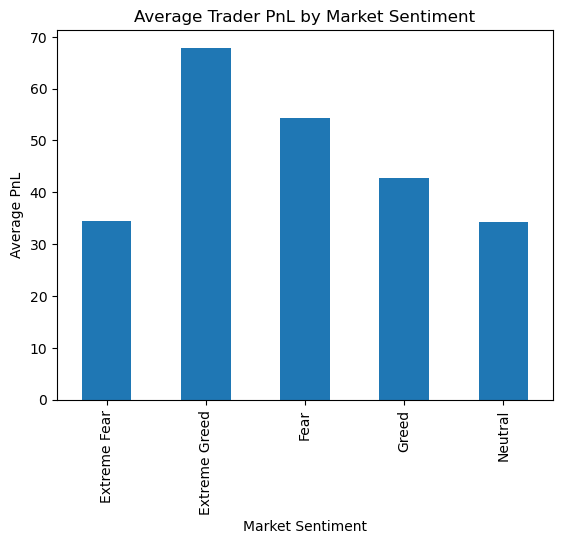

In [36]:
import matplotlib.pyplot as plt

merged.groupby('Classification')['Closed PnL'].mean().plot(kind='bar')
plt.title('Average Trader PnL by Market Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Market Sentiment')
plt.show()
